# **Time Series Analysis**
## Some Terminology
- Equities/Stocks: Shares of ownership issued by publicly traded companies (What we will be trading)
- Ticker: The symbol used to represent a publicly traded company (ex. AAPL = Apple, TSLA = Tesla, etc.)
## What is a time series?
In many fields of study data is collected from a system. The obserbations made of such a process will generate a time series. In simplest terms, a time series is a set of data indexed by time. For the purposes of quant finance, we will be working with financial time series such as the daily closing price of a stock or the quarterly profits of a company. A great python module for working with this type of data is Pandas, which will be covered later on.
### Examples of time series:
Below is an example of how a time series that we will be working with is structured. Notice how the indexes are strictly increasing with constant time intervals

![Image of SPY Time Series](https://raw.githubusercontent.com/trombonee/QUANTTEducation/master/Tutorials/TimeSeriesLecture/img/SPYTimeSeries.png)

We can also plot time series data to get a better visualization of possible trends or correlations in data

![Image of SPY Time Series Plot](https://raw.githubusercontent.com/trombonee/QUANTTEducation/master/Tutorials/TimeSeriesLecture/img/SPYTimeSeriesPlot.png)

## The above can be accomplished with Python and a few modules

### Step One: Import necessary modules


In [1]:
import pandas as pd

### Step Two: Load time series data set (Data in QuantConnect will be loaded differently)

In [2]:
df = pd.read_csv('AAPL_data.csv', index_col=['name', 'date'])
df.head()

open    high      low   close    volume
name date                                                
AAPL 9/12/2017  162.61  163.96  158.770  160.86  71714046
     9/13/2017  159.87  159.96  157.910  159.65  44907361
     9/14/2017  158.99  159.40  158.090  158.28  23760749
     9/15/2017  158.47  160.97  158.000  159.88  49114602
     9/18/2017  160.11  160.50  157.995  158.67  28269435

### Step Three: Plot the time series data

<AxesSubplot:xlabel='date'>

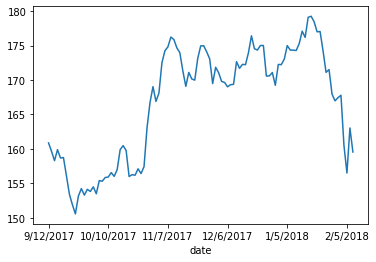

In [3]:
closing_prices = df.loc['AAPL']['close']
closing_prices.plot()


## Motivation: What if there was a way to perform analysis on this data to forecast future values?
Clearly if we were able to predict the future values of an equity, there would be a potential to make extremely large amounts of money. Even if we could predict correctly 51% of the time, this could be leveraged over a large number of trades to make significant profits. The study of time series analysis attempts to apply math methods and statistics to this problem.

## How do we go about doing this?
Modern time series analysis dates back to 1927 when a statitician G. U. Yule used an **autoregressive model** to describe the dynamic movement of a pendulum. As who have taken a course on differential equations may know, the movement of a pendulum can be approximated by a second order linear differential equation. Differential equations are used to describe dynamic processes in continuous time, but time series data is typically sampled in discrete time steps (i.e., the price of stock every minute, every hour or every day). If the second order differential equation of a pendulum is substituted with discrete time differences, the resulting equation takes on the form:

![Image discrete pendulum equation](https://raw.githubusercontent.com/trombonee/QUANTTEducation/master/Tutorials/TimeSeriesLecture/img/DiscretePendulum.png)

The important thing to note here is that the position at time **t** relies on the position of the pendulum at time **t-1** and **t-2**. This is called an **autoregressive model** specifically because of this behaviour. Our goal is to apply similar ideas to create models for financial time series and forecast useful information.

**NOTE:** Notice, there are coefficient terms $\phi_1$ and $\phi_2$. If these values are too large, say +2 and +3, this equation will go to $|\infty|$ as t goes to $+\infty$. The need to find coefficients such that the equation remains stable (finite valued) brings rise to the topic of stationarity. 

# Stationarity:
## What is stationarity?
A time series is stationary if it is a finite variance process of which the mean and variance are constant in time (i.e., $E[z_t]=\mu$ and $Var[z_t]=\sigma^2$ for all time **t**), and the correlation between observations at different points in time is only lag dependent (i.e., $Cov(z_{t+k},z_t)$ depends only on k for all of time **t**)

We will never specifically need to compute these values by hand so we will not cover their formulas, but feel free to do your own research. These computations can however be made quite easily with the NumPy module in Python

### Step One: Import NumPy


In [4]:
import numpy as np


### Step Two: Peform expected value computation

In [5]:
expected_val = np.mean(closing_prices)
print(f"The mean of the set is: {expected_val}")

The mean of the set is: 166.74300970873784


### Step Three: Perform variance calculation

In [6]:
variance = np.var(closing_prices)
print(f"The variance of the set is: {variance}")

The variance of the set is: 66.98112589310965


### Step Four: Perform auto-covariance calculation
This calculation is a little more involved since it looks at two seperate time sets **T** offset by some integer **k**

In [7]:
set1 = closing_prices['9/12/2017':'1/2/2018']
set2 = closing_prices['9/22/2017':'1/12/2018']
cov_matrix = np.cov(set1, set2)
print(f'The auto-covariance with k = 10 is: {cov_matrix[0][1]}')

The auto-covariance with k = 10 is: 51.34408701298701


Sometimes it is possible to predict if a time series is stationary based off of its graph. Can you tell which graphs below show the characteristics of stationarity?
Hint: Remember we are looking for finite mean and finite variance

![Image of Stationarity Test](https://raw.githubusercontent.com/trombonee/QUANTTEducation/master/Tutorials/TimeSeriesLecture/img/StationarityTest.png)

## Why do we care about stationarity?
The Wold Decomposition Theorem states that any stationary time series can be decomposed and represented in the following form:

# $z_t=a_t+\sum^\infty_{j=1}\psi_ja_{t-j}+\mu$

Where $a_t$'s are uncorrelated random shocks with zero mean and constant variance (i.e., white noise), $\psi_j$ satisfies $\sum_{i=0}^\infty\psi_i^2<\infty$ and $\mu$ is the mean of the time series

The forecasting methods we will cover essentially provide ways to approximate the values to the above equation, which is why having stationarity in our time series is so important.

## What if our time series is not stationary?
### Data Transformations
Transformations on time series data are sometime necessary when dealing with nonlinear data. It could make sense to scale the data in a way such that it becomes linear. A common example of this is the Richter scale which uses a log base. Often the main goal of a transformation is to make the variance in our data constant. One useful transformation when working with financial data could be the percentage change.

# $p_t=\frac{z_{t}-z_{t-1}}{z_{t-1}}$

### Apply the percentage change transformation to the AAPL data:
#### Original Plot:

<AxesSubplot:xlabel='date'>

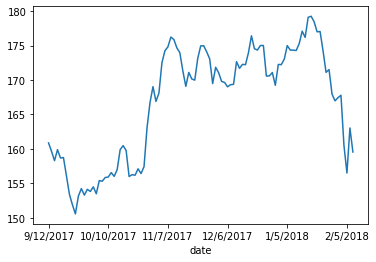

In [8]:
closing_prices.plot()

#### With Percentage Change:

<AxesSubplot:xlabel='date'>

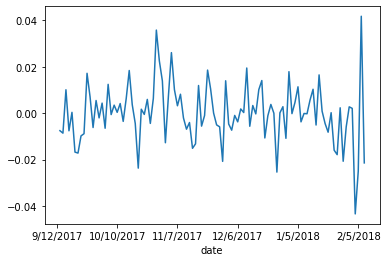

In [9]:
closing_prices.pct_change().plot()

Notice how the time series immediately looks to be more stationary

### Differencing
Differencing provides another way modify the dataset in hopes of acheiving stationarity. The first order difference is the easiest to understand. If considering the daily price values of an equity, the first order differenced time series would be the daily change in price time series. Formally, this is written as:

# $\Delta z_t=z_t-z_{t-1}$

It can be accomplished very easily in Python

#### First order difference of AAPL:

<AxesSubplot:xlabel='date'>

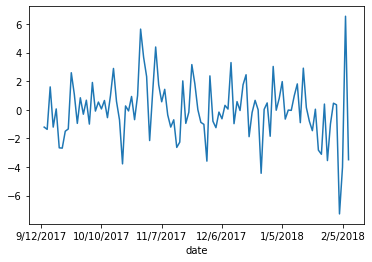

In [10]:
first_diff = closing_prices.diff()
first_diff.plot()

**NOTE:** Notice how this looks very similar to the percent change plot on a larger scale

If a first order differenced time series is not yet stationary, we can apply the differecing process again:

# $\Delta^2z_t=\Delta (z_t-z_{t-1})=(z_t-z_{t-1}-z_{t-1}-z_{t-2})=z_t-2z_{t-1}-z_{t-2}$

<AxesSubplot:xlabel='date'>

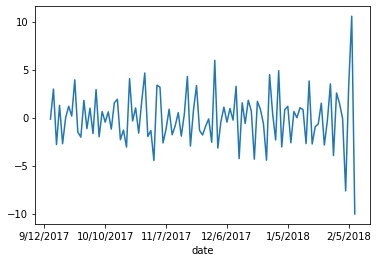

In [11]:
second_diff = first_diff.diff()
second_diff.plot()

**NOTE:** This process can be repeated as many times as necessary to achieve stationarity, however in practice it is almost never required to go beyond second-order differencing. An important thing to keep in mind is that each time a time series is differenced, the series loses "memory" in the data (i.e., trends, seasonality, etc.). This can cause issues when trying to use the data in forecasting, hence it is important to apply the minimum number of differences possible

Now that we know how to transform and difference our data we must be able to check for stationarity

## How do we check for stationarity?
The most simple method of checking for stationarity would involve visual analysis as we did in the example earlier, however this is not something that could be easily implemented with code. Luckily there have been some genius mathematicians that have developed algorithms which can predict if a time series is stationary. One of the more common ones used in industry is known as the Augmented Dickey-Fuller test. This tests the null hypothesis that a **unit root** is present in a time series sample (i.e., 1 is a root in the characteristic equation for the time series, assuming the series can be represented by a characteristic equation). We are simply looking for this hypothesis to be rejected meaning there is no **unit root**.

One Python module that implements this algorithm is **statsmodels**, where the function returns an array including a p-value. Typically if $p < 5\%$ we can reject the null hypothesis and assume that the time series is staitionary.

### Check if AAPL is stationary:

In [12]:
from statsmodels.tsa.stattools import adfuller
adfuller(closing_prices)[1]

0.19337607606716378

Not surprisingly, the time series is non-stationary. Now what if we difference it?

### Difference AAPL until it is stationary:
**NOTE:** When you difference a time series, the first value will become NaN. This must be dealt with.

In [13]:
first_diff.head()

date
9/12/2017     NaN
9/13/2017   -1.21
9/14/2017   -1.37
9/15/2017    1.60
9/18/2017   -1.21
Name: close, dtype: float64

In [14]:
first_diff = first_diff.drop('9/12/2017')
first_diff.head()

date
9/13/2017   -1.21
9/14/2017   -1.37
9/15/2017    1.60
9/18/2017   -1.21
9/19/2017    0.06
Name: close, dtype: float64

In [15]:
adfuller(first_diff)[1]

0.07613592991524183

Even still the time series is not stationary so we must difference once again:

In [16]:
second_diff = second_diff.drop(['9/12/2017','9/13/2017'])
second_diff.head()

date
9/14/2017   -0.16
9/15/2017    2.97
9/18/2017   -2.81
9/19/2017    1.27
9/20/2017   -2.72
Name: close, dtype: float64

In [17]:
adfuller(second_diff)[1]

7.877540581135613e-08

Finally, we have found a p-value less than 0.05 so we can call the time series stationary. However since we had to difference the time series twice we have lost a significant amount of "memory" from the original time series.

Now that we can detect stationarity, lets discuss some forecasting methods

## Forecasting Methods
We will not dive into the mathematics behind these methods but rather step through the process of using them

### AR (Autoregression) Model
An Autoregression model takes on the following form with parameter $p$:

# $z_t=\phi_1z_{t-1}+\phi_2z_{t-2}+...+\phi_pz_{t-p}+a_t$

Where $a_t$ is an error term, $\phi_i$'s are coefficients estimated from data and $z_t$ is the value of the time series at time t 

### MA (Moving Average) Model
Theses models are "averages" of past and present error terms. A Moving Average model takes on the following form with parameter $q$:

# $z_t=a_t-\theta_1a_{t-1}-...-\theta_qa_{t-q}$

Where $a_t$'s are once again error terms, $\theta_i$'s are coefficients estimated from data and $z_t$ is the value of the time series at time t

You will rarely implement either of these models on their own. The AR(p) and MA(q) models are often used as the building blocks of more sophisticated models in time series analysis
### ARMA (Autoregressive Moving Average) Model

Not surprisingly this model was developed by combining autoregression and moving average models. These models take on the following form with parameters $p$ and $q$:

# $z_t=\phi_1z_{t-1}+\phi_2z_{t-2}+...+\phi_pz_{t-p}+a_t-\theta_1a_{t-1}-...-\theta_qa_{t-q}$

This model is very common when modeling stationary data. Both $p$ and $q$ represent a lag period for their respective model, it is up to the user to determine the optimal value for each.

### ARIMA (Autoregressive Integrated Moving Average) Model
The ARIMA model takes ARMA one step further by adding a parameter $d$, which is the number of times we want to difference our time series before applying the ARMA model to it. This allows us to input non-stationary data into the model. We will now attempt to fit an **ARIMA** model with Python.

### Step One: Import the necessary Modules

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

### Step Two: Inspect Auto-Correlation and Partial Auto-Correlation Plots

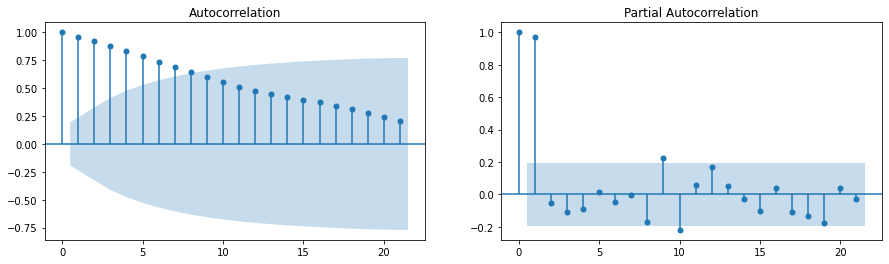

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

fig = plot_acf(closing_prices.values, ax=axes[0])
fig = plot_pacf(closing_prices.values, ax=axes[1])

This gives us some insight into how auto-correlated our data is. On the bottom axis is the lag period (i.e., when $z_t$ is compared to $z_{t-1}$ this represents a lag of 1). Based on these graphs we would not want to use a lag value greater than two.

### Step Three: Determine value for p

In [20]:
p_val = ar_select_order(closing_prices.values, maxlag=6, old_names=False)
p_val.ar_lags

array([1])

Sometimes an array of multiple lag values will be returned. You are able to input the entire array in the ARIMA model as parameter $p$.
### Step Four: Forecast with model

In [21]:
model = ARIMA(closing_prices.values, order=(1,2,0))
result = model.fit()
result.forecast()

array([160.60473234])

Using this forecasted result you could then implement logic in your algorithm to make a trading decision.

### Below is an example of how an ARIMA model would forecast the AAPL data using a 30 day lookback period

In [22]:
closing = closing_prices.values
forecast = [np.nan]*30
for i in range(30, len(closing)):
    window = closing[i-30:i]
    model = ARIMA(window, order=(1,2,0))
    result = model.fit()
    forecast.append(result.forecast()[0])

df['forecast'] = forecast

<AxesSubplot:xlabel='date'>

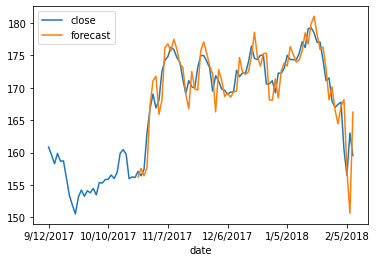

In [23]:
data = df.loc['AAPL'][['close','forecast']]
data.plot()

This **ARIMA** model in the **statsmodels** library is very powerful as it also allows you to account for seasonality in your data with a few extra parameters. I would highly recommend doing more research into it. If you do plan to use this in an algorithm, you will see the best results if you can find data sets which exhibit properties of stationarity and have high auto-correlation. 